# Conceptual

1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.
    
    a. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
    
    In this scenario we'd expect a more flexible model to udnerstand the data better as there are many observations and small number of variables. In the small dimensional case more flexible model could easily overfit the data. We have to be cautious for this.
    
    b. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
    
    In this scenario we'd expect to have lesser performance by the more flexible model as the amount of data to learn from is not enough. 
    
    c. The relationship between the predictors and response is highly non-linear.
    
    In this scenario, the winner would be more flexible model as per definition it's able to undertand non-linear relations.
    
    d. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high.
    
    In this scenario, we can expect both flexible and inflexible method to perform similarly as the error would be dominated by $Var(\epsilon)$

2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide $n$ and $p$.

    a. We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.
    
    This is a regression problem as we are interested in CEO salary, which is quantitative variable. Moreover, it is a inference problem - we want to know what factors affect the CEO salary. The data we'd work here has 500 observations ($n$) and 3 variables ($p$).
    
    b. We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
    
    This is a classification problem as we want to predict the binary case for success or a failure. The problem would have a focus on predictions as we are launching new product. We'd work with 20 observations and 13 variables.
    
    c. We are interest in predicting the % change in the USD/Eur exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.
    
    This is a regression problem as the % change is quantitative variable. We are interested in predictions. The data has 52 observations and 3 variables.

5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

When the underlying relationship between variables and target variable is not complex we would prefer less flexible model as it will prevent from overfitting (e.g. linear regression when we have linear relationship). However, the true relationship is now known in real world. In this case we have to answer ourselves are we interested in predictions or inference. Then we can use more flexible models for the former and less flexible in the latter.

6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

Parametric models is independant on the data - number of observations and dimensions. Its advantage lies in the more computantionally inexpensive fit of the data. 

7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

    a. Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

    1. 3
    2. 2
    3. $\sqrt{10} \approx 3.16 $
    4. $\sqrt{5} \approx 2.24$
    5. $\sqrt{2} \approx 1.41$
    6. $\sqrt{3} \approx 1.73$
    
    b. What is our prediction with K = 1? Why?
    
    In this case our prediction would be Green, as this is the colour of the closes point - number 5.
    
    c. What is our prediction with K = 3? Why?
    
    In this case our prediction would be Red. The thre closest points are 2, 5, and 6. And among them we have 2 Reds and 1 Green.
    
    d. If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?
    
    In the case of highly non-linear Bayes decision boundary, we'd expect the best value for K to be small. In this case we allow for more flexibiility in the model.

# Applied

8. 

In [7]:
college <- read.csv('College.csv')

In [8]:
fix(college)

In [9]:
rownames(college) = college[, 1]
fix(college)

In [10]:
college = college[, -1]
fix(college)

In [11]:
summary(college)

   Private               Apps           Accept          Enroll    
 Length:777         Min.   :   81   Min.   :   72   Min.   :  35  
 Class :character   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242  
 Mode  :character   Median : 1558   Median : 1110   Median : 434  
                    Mean   : 3002   Mean   : 2019   Mean   : 780  
                    3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902  
                    Max.   :48094   Max.   :26330   Max.   :6392  
   Top10perc       Top25perc      F.Undergrad     P.Undergrad     
 Min.   : 1.00   Min.   :  9.0   Min.   :  139   Min.   :    1.0  
 1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0  
 Median :23.00   Median : 54.0   Median : 1707   Median :  353.0  
 Mean   :27.56   Mean   : 55.8   Mean   : 3700   Mean   :  855.3  
 3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :96.00   Max.   :100.0   Max.   :31643   Max.   :21836.0  
    Outstate       Room.Board       Books           Personal  

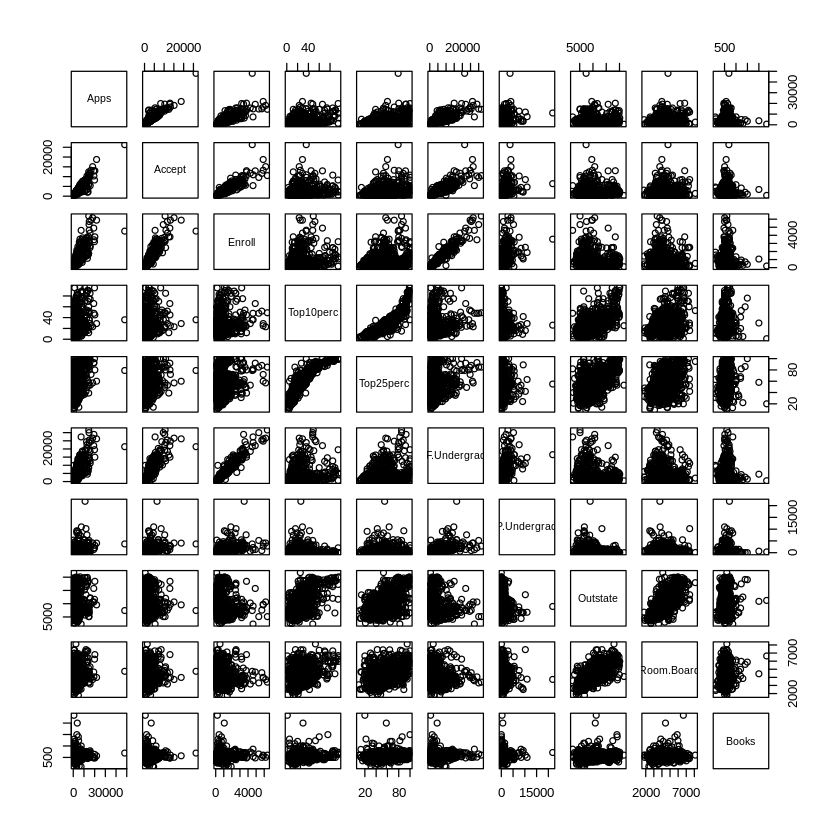

In [14]:
pairs(college[, 2:11])

In [18]:
attach(college)

In [19]:
Private <- as.factor(Private)

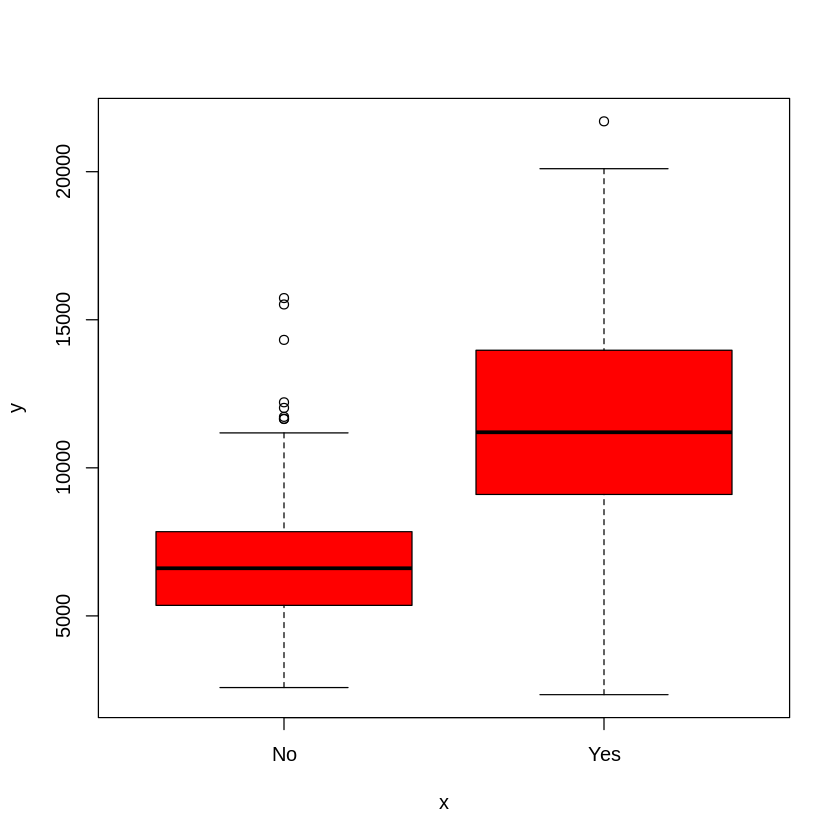

In [24]:
plot(Private, Outstate, col = 'red')

In [32]:
Elite <- rep("No", nrow(college))
Elite[Top10perc > 50] <- 'Yes'
Elite <- as.factor(Elite)
college <- data.frame(college, Elite)

In [35]:
summary(Elite)

No Yes 
699  78

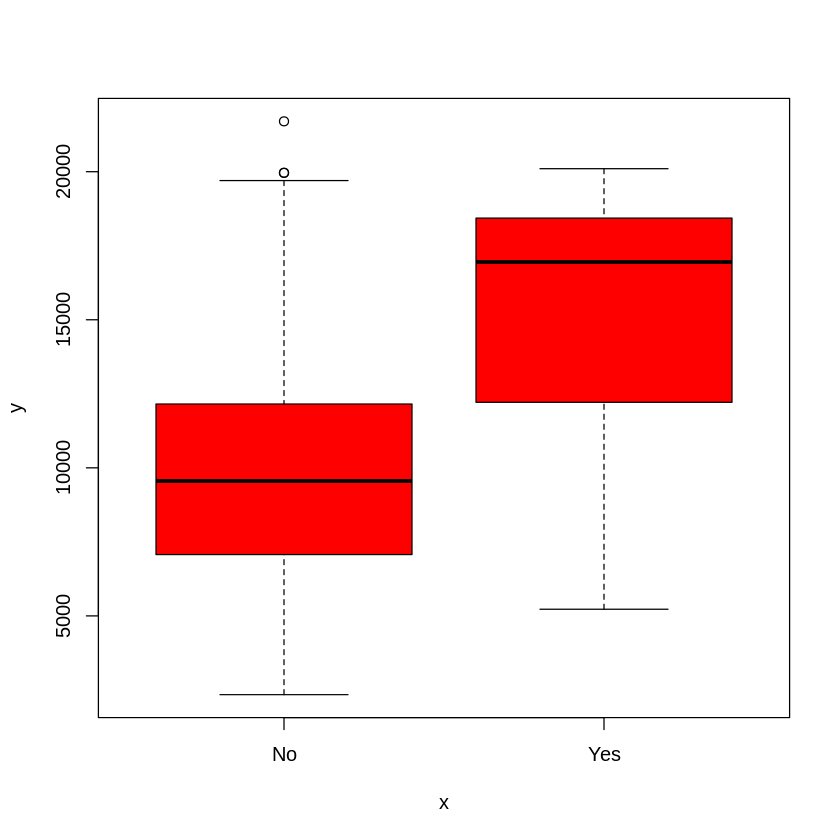

In [36]:
plot(Elite, Outstate, col = 'red')

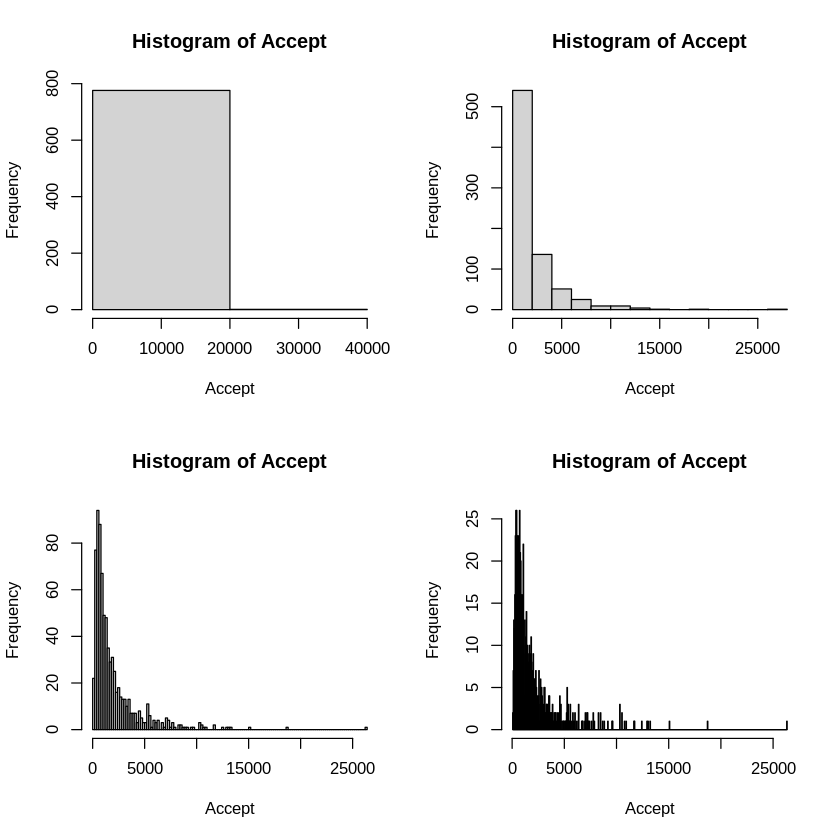

In [40]:
par(mfrow=c(2,2))
hist(Accept,breaks=1)
hist(Accept,breaks=10)
hist(Accept,breaks=100)
hist(Accept,breaks=500)

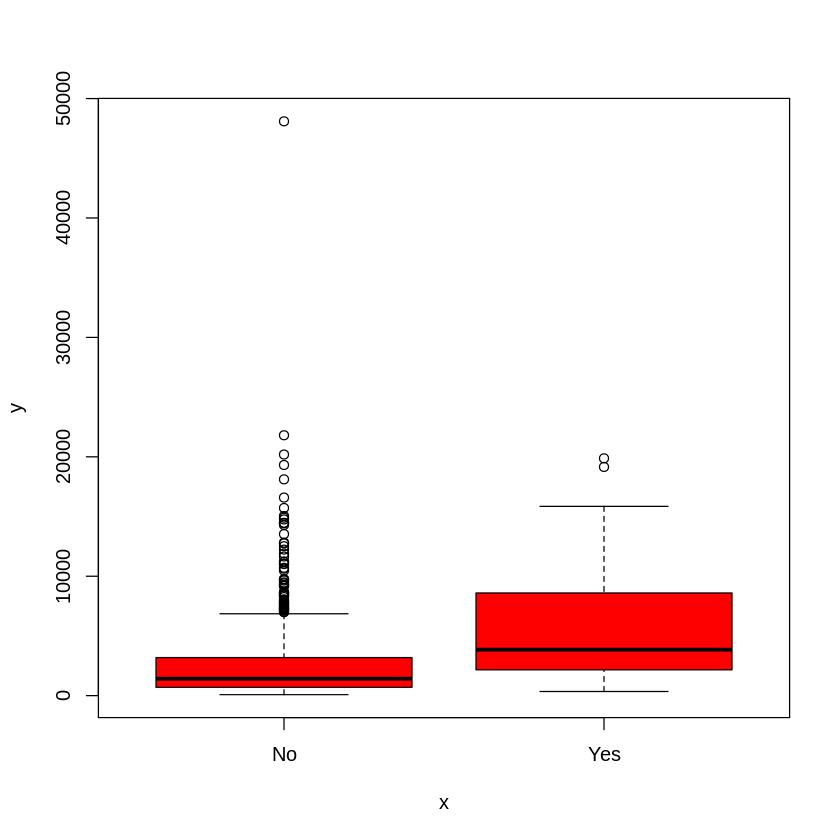

In [51]:
plot(Elite, Apps, col = 'red')

9.

In [55]:
auto = read.csv('Auto.csv', header=T, na.strings="?")

In [56]:
auto = na.omit(auto)

Which of the predictors are quantitative, and which are qualitative?

- quantitative:
    - mpg
    - cylinders
    - displacement
    - horsepower
    - weight
    - acceleration
    - year
    - origin
- qualitative
    - name

What is the range of each quantitative predictor? You can answer this using the range() function.

In [72]:
names(auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

In [114]:
sapply(auto[, 1:ncol-1], range)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
9.0,3,68,46,1613,8.0,70,1
46.6,8,455,230,5140,24.8,82,3


What is the mean and standard deviation of each quantitative predictor?

In [113]:
sapply(auto[, 1:ncol-1], sd)

mpg    cylinders displacement   horsepower       weight acceleration 
   7.8050075    1.7057832  104.6440039   38.4911599  849.4025600    2.7588641 
        year       origin 
   3.6837365    0.8055182

Now remove the 10th through 85th observations. What is therange, mean, and standard deviation of each predictor in the subset of the data that remains?

In [94]:
auto_sample = auto[-c(10:85), ]

In [96]:
dim(auto_sample)

[1] 316   9

In [111]:
sapply(auto_sample[, 1:8], range)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
11.0,3,68,46,1649,8.5,70,1
46.6,8,455,230,4997,24.8,82,3


In [112]:
sapply(auto_sample[, 1:8], mean)

mpg    cylinders displacement   horsepower       weight acceleration 
   24.404430     5.373418   187.240506   100.721519  2935.971519    15.726899 
        year       origin 
   77.145570     1.601266

In [115]:
sapply(auto_sample[, 1:8], sd)

mpg    cylinders displacement   horsepower       weight acceleration 
    7.867283     1.654179    99.678367    35.708853   811.300208     2.693721 
        year       origin 
    3.106217     0.819910

Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

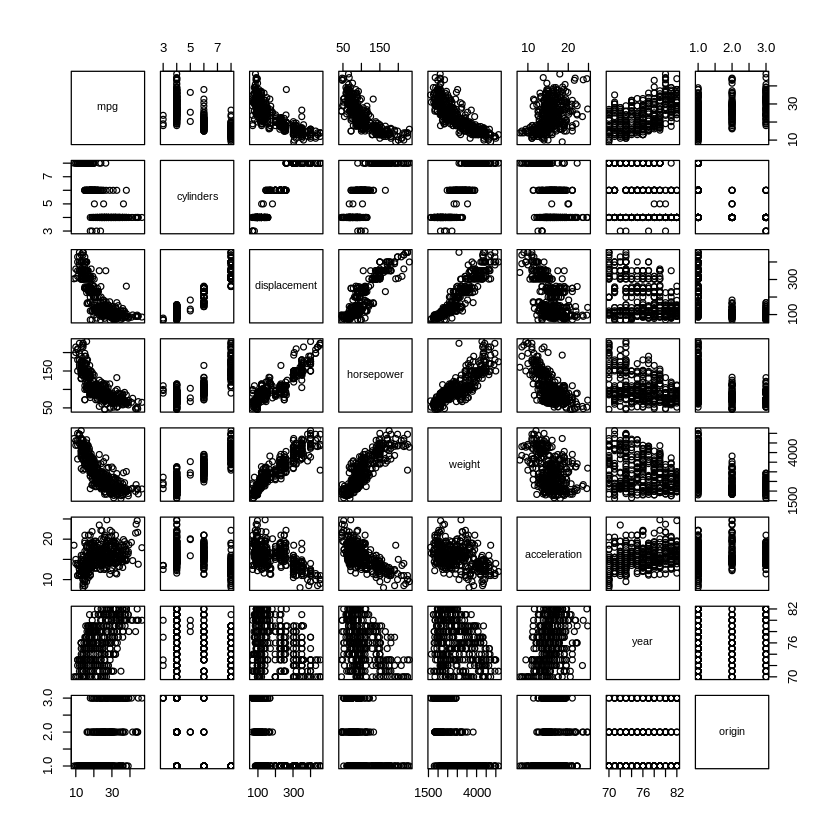

In [116]:
pairs(auto[,1:8])

In [117]:
auto$year <- as.factor(auto$year)

In [122]:
auto$cylinders <- as.factor(auto$cylinders)

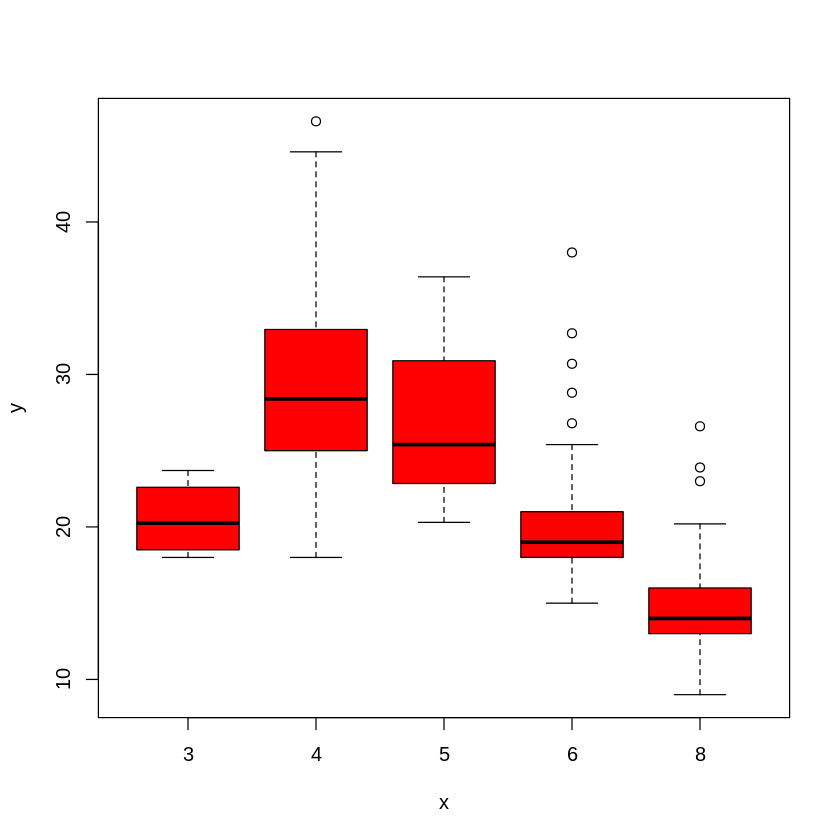

In [123]:
plot(auto$cylinders, auto$mpg, col = 'red')

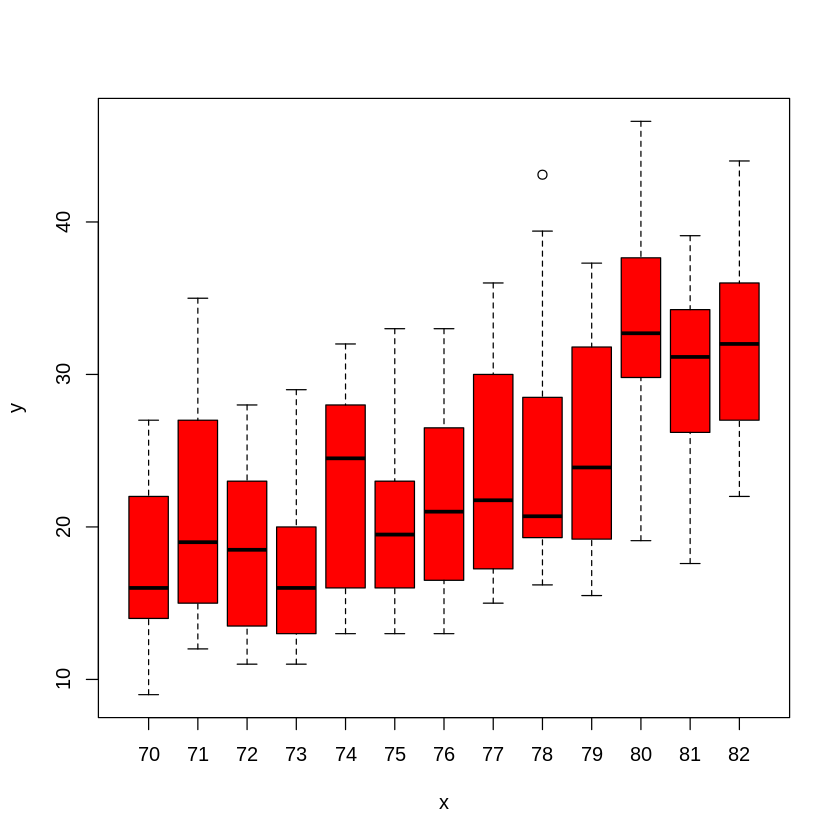

In [119]:
plot(auto$year, auto$mpg, col = 'red')

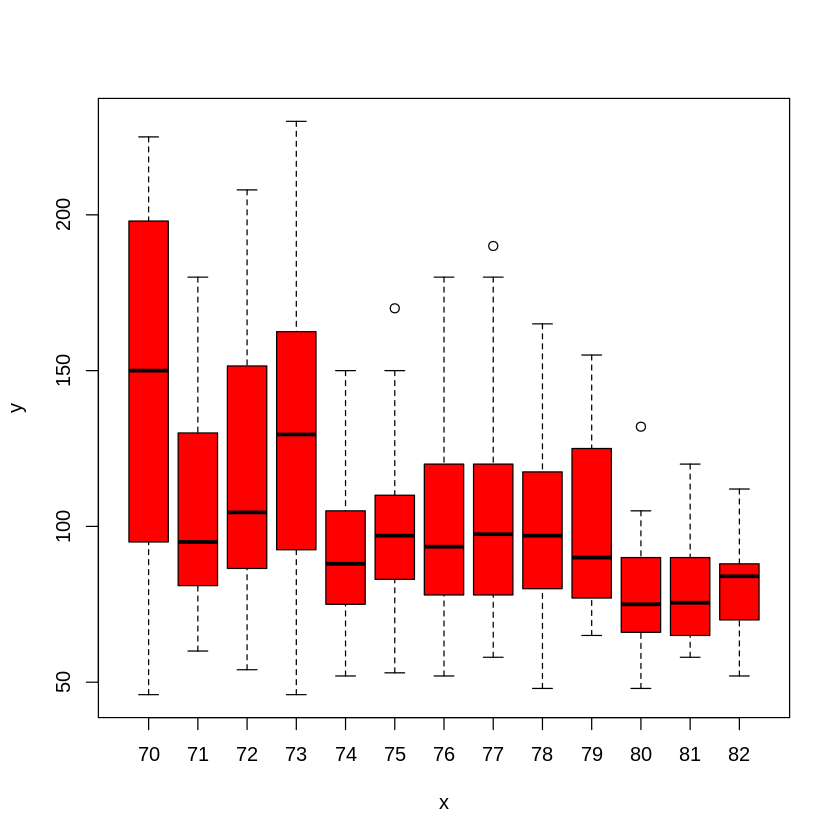

In [125]:
plot(auto$year, auto$horsepower, col = 'red')

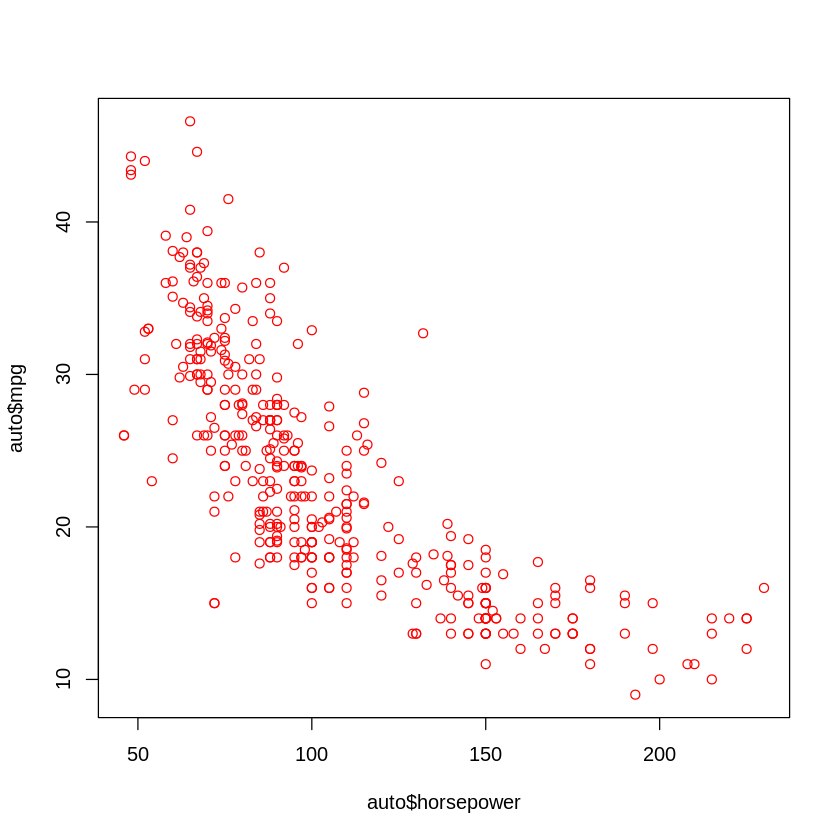

In [126]:
plot(auto$horsepower, auto$mpg, col = 'red')

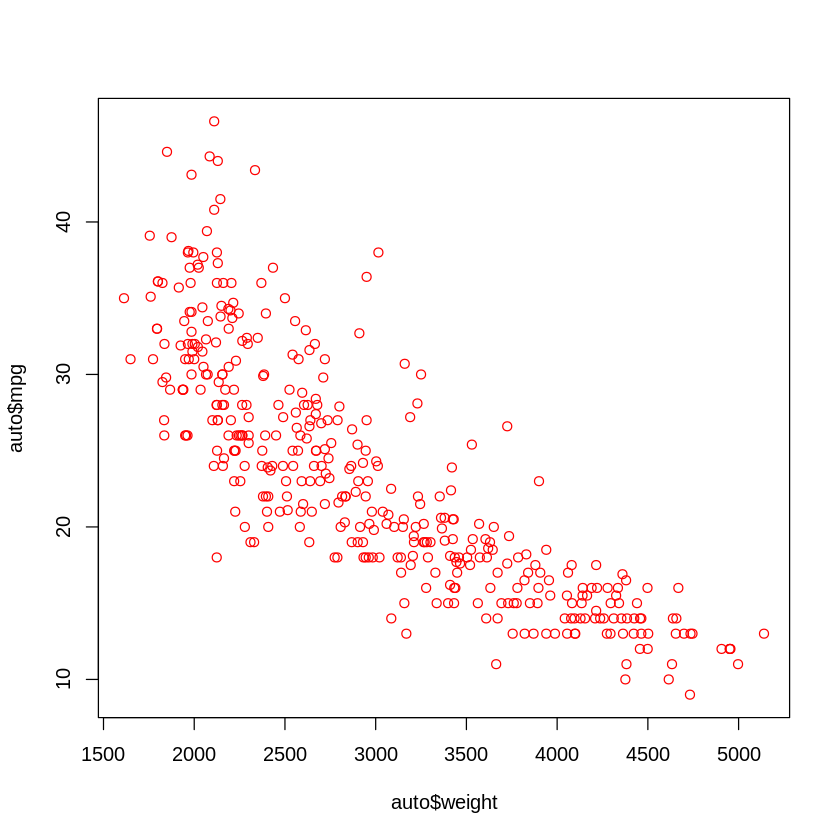

In [127]:
plot(auto$weight, auto$mpg, col = 'red')

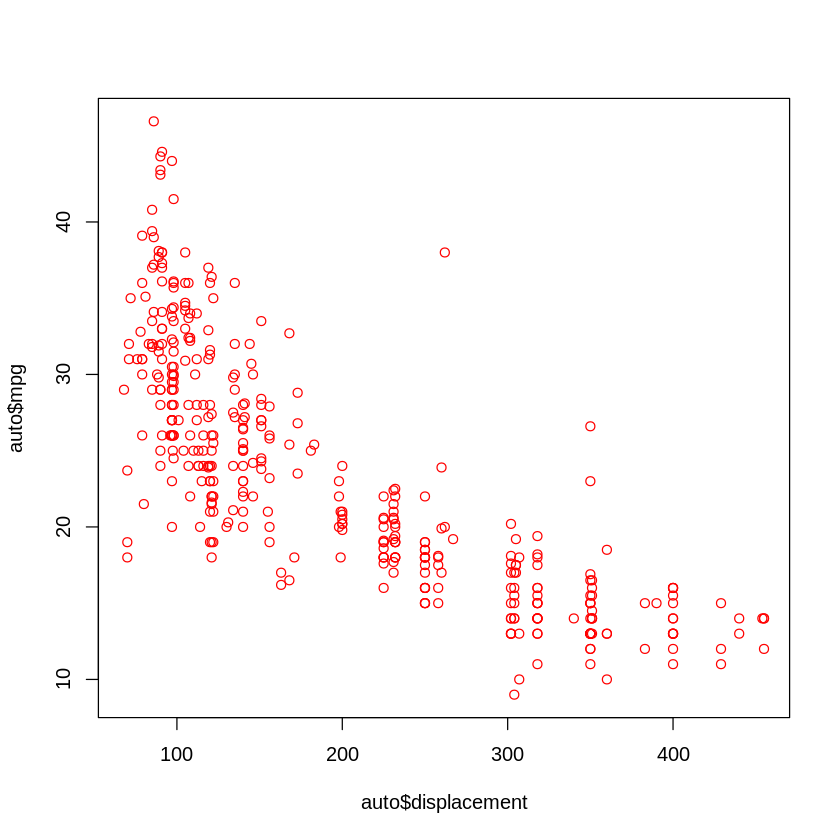

In [128]:
plot(auto$displacement, auto$mpg, col = 'red')

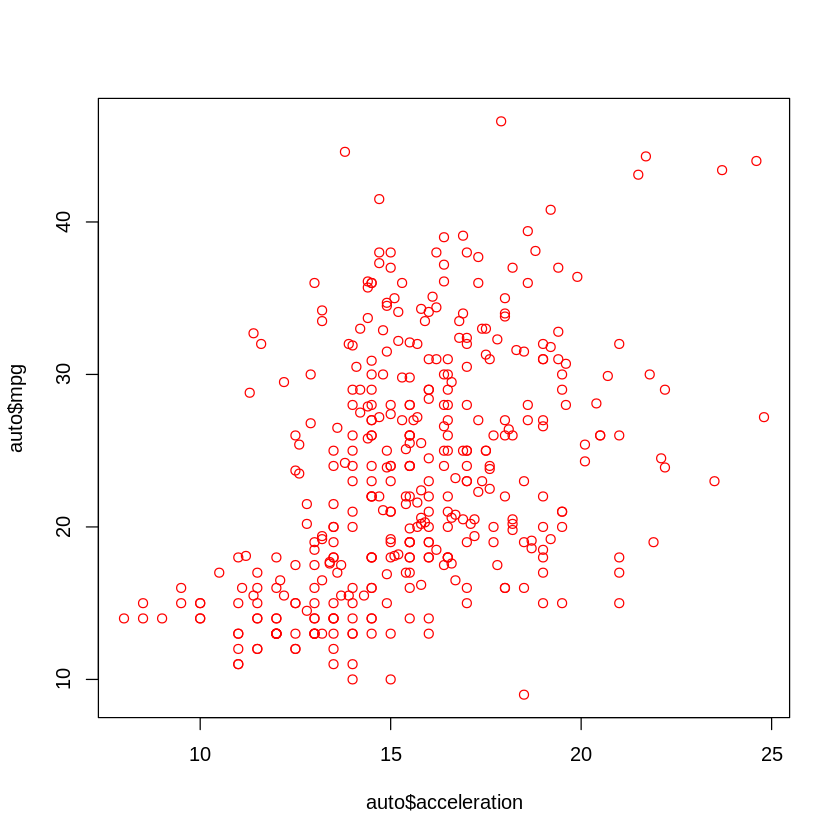

In [129]:
plot(auto$acceleration, auto$mpg, col = 'red')

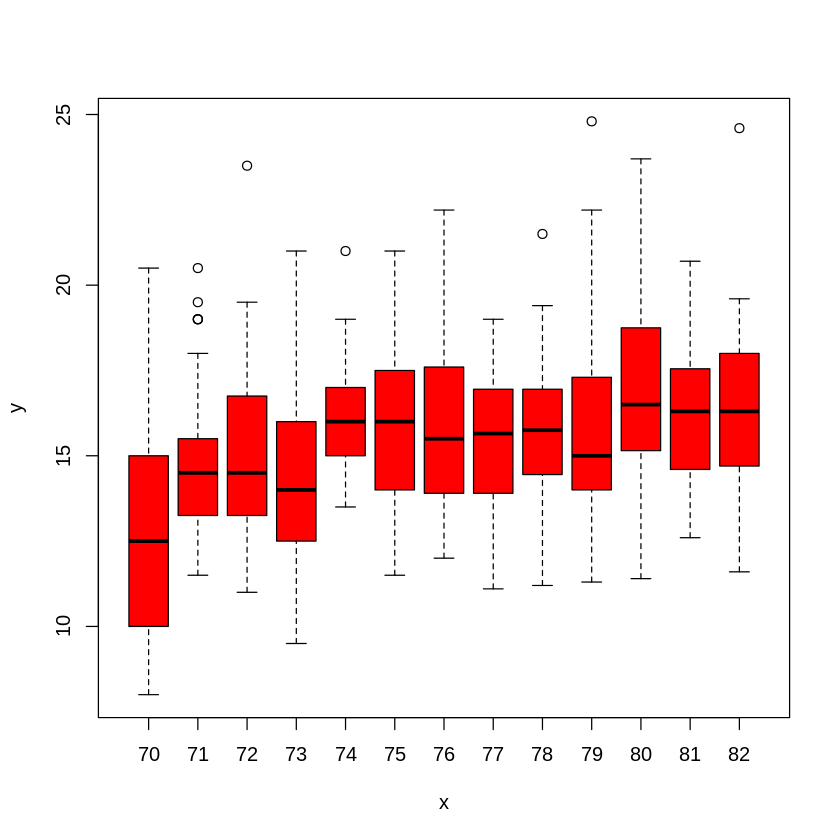

In [130]:
plot(auto$year, auto$acceleration, col = 'red')

The brief check shows that **mpg** has a strong correlation with several variables such as cylinders, horsepower, and weight. Also, there isn't a strong correlation with acceleration. In potential modelling we can skip this variable as it might not bring any valuable information.

10. 

In [136]:
library('MASS')

How many rows are in this data set? How many columns? What do the rows and columns represent?

The data has 506 observations and 14 variables. Each row represents a particular house with all the relevant information about it.

Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

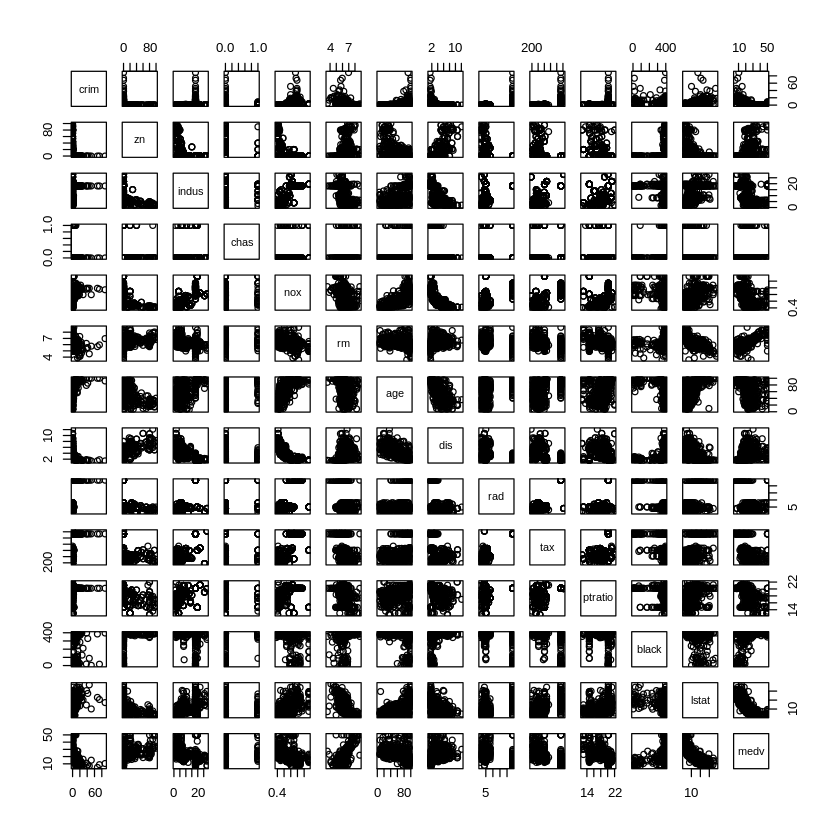

In [141]:
pairs(Boston)

At first glance there isn't high correlation between median value of a home and the provided predictors, apart from number of rooms per dwelling.

Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

It seems that there's no association between per capita crime rate and other predictors as seen in the pairwise scatter plots.

Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

In [145]:
sapply(Boston, quantile)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0%,0.006320,0.0,0.46,0,0.385,3.5610,2.900,1.129600,1,187,12.60,0.3200,1.730,5.000
25%,0.082045,0.0,5.19,0,0.449,5.8855,45.025,2.100175,4,279,17.40,375.3775,6.950,17.025
50%,0.256510,0.0,9.69,0,0.538,6.2085,77.500,3.207450,5,330,19.05,391.4400,11.360,21.200
75%,3.677083,12.5,18.10,0,0.624,6.6235,94.075,5.188425,24,666,20.20,396.2250,16.955,25.000
100%,88.976200,100.0,27.74,1,0.871,8.7800,100.000,12.126500,24,711,22.00,396.9000,37.970,50.000


How many of the suburbs in this data set bound the Charles
river?

In [146]:
sum(Boston$chas)

[1] 35

What is the median pupil-teacher ratio among the towns in this
data set?

19.05

Which suburb of Boston has lowest median value of owner-
occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [153]:
Boston[Boston$medv==min(Boston$medv),]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


The crime rate in those suburbs is much higher than the normal. Also, those suburbs consists of houses built before 1940 as 100% of houses in the data fall into this category. They also don't have an access to highways. 

In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling

In [154]:
Boston[Boston$rm >= 7, ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
5,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
41,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
56,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
65,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
89,0.05660,0.0,3.41,0,0.4890,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
90,0.05302,0.0,3.41,0,0.4890,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
99,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8


In [155]:
Boston[Boston$rm >= 8, ]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98,0.12083,0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
164,1.51902,0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
205,0.02009,95,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.31533,0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
226,0.52693,0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
227,0.38214,0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
233,0.57529,0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
234,0.33147,0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
254,0.36894,22,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8


The suburbs with more than 8 rooms per dwelling seem to be rather old as percentage of houses built before 1940 is high. It also seem to have lower crime rate.